# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [3]:
df_tesla = pd.read_csv('data/TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('data/Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('data/Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('data/UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [4]:
print(df_tesla.shape)  # (rows, columns)
print(df_tesla.columns)

(124, 3)
Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')


In [5]:
print(f'Largest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [6]:
df_tesla.describe()  # This function gives the mean, std and IQR values. And, function excludes the character columns and given summary about numeric columns

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


### Unemployment Data

In [7]:
print(df_unemployment.shape)  # (rows, columns)
print(df_unemployment.columns)

(181, 3)
Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')


In [8]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [9]:
print('Largest value for "Unemployment Benefits" '
      f'in Web Search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.max()}')

Largest value for "Unemployment Benefits" in Web Search: 100


In [10]:
df_unemployment.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


### Bitcoin

In [11]:
print(df_btc_price.shape)  # (rows, columns)
print(df_btc_price.columns)

(2204, 3)
Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')


In [12]:
print(df_btc_search.shape)  # (rows, columns)
print(df_btc_search.columns)

(73, 2)
Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')


In [13]:
print(f'Largest BTC News Search: {df_btc_search.BTC_NEWS_SEARCH.max()}')

Largest BTC News Search: 100


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [14]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [15]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for BTC price?: True


In [16]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')
print(f'Missing values:\n{df_btc_price[df_btc_price.CLOSE.isna()]}')  # use this to exactly see where the NA values are, can use any column to check, but the NaN is in close or volume

Number of missing values: 2
Missing values:
            DATE  CLOSE  VOLUME
2148  2020-08-04    NaN     NaN


**Challenge**: Remove any missing values that you found. 

In [17]:
df_btc_price.dropna(inplace=True)  # inplace means we dont need to do df = df.dropna() etc etc

In [18]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')  # check

Missing values for BTC price?: False


### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [19]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)

In [20]:
type(df_tesla.MONTH[0])  # check if success, is yes type should be timestamp

pandas._libs.tslibs.timestamps.Timestamp

In [21]:
df_tesla.MONTH.head()

0   2010-06-01
1   2010-07-01
2   2010-08-01
3   2010-09-01
4   2010-10-01
Name: MONTH, dtype: datetime64[ns]

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

We are doing this because the bitcoin search dataframe is monthly and the bitcoin price dataframe is daily, so we resample the price dataframe to monthly so they match and we can compare them easily.

In [44]:
df_btc_monthly = df_btc_price.resample('M', on='DATE').last()  # this resamples all the data to the last entry of the month, if we want the average we need to use .mean()

In [45]:
print(df_btc_monthly.shape)
df_btc_monthly.head()

(73, 3)


,DATE,CLOSE,VOLUME
DATE,,,
2014-09-30,2014-09-30,386.944000,34707300.0
2014-10-31,2014-10-31,338.321014,12545400.0
2014-11-30,2014-11-30,378.046997,9194440.0
2014-12-31,2014-12-31,320.192993,13942900.0
2015-01-31,2015-01-31,217.464005,23348200.0


# Data Visualisation

### Tesla Stock Price v.s. Search Volume

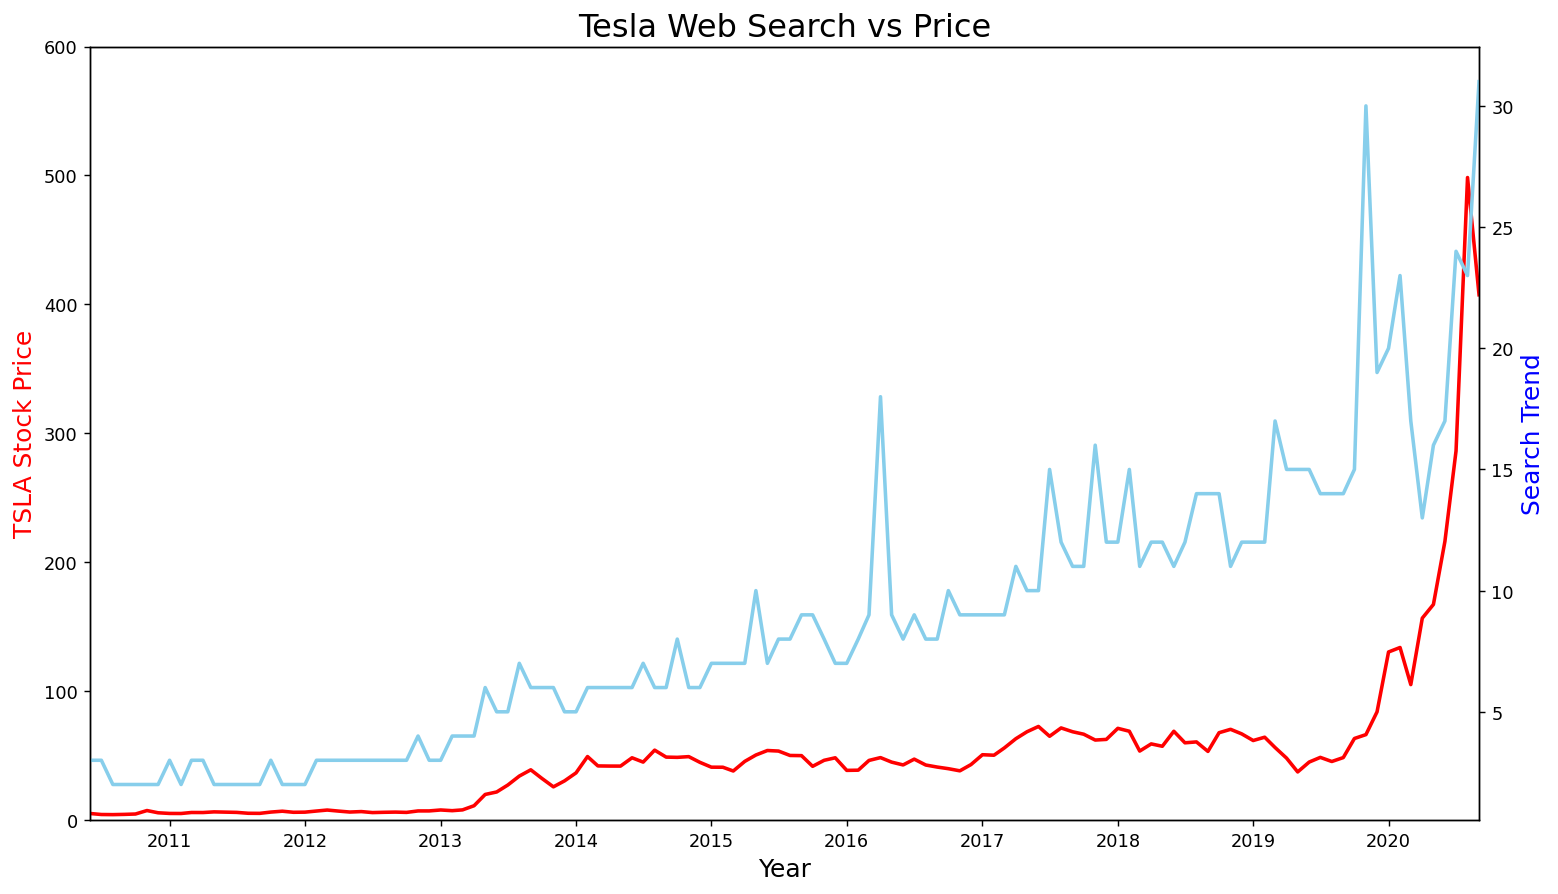

In [34]:
# size and resolution and title
plt.figure(figsize=(14,8), dpi=128)
plt.title('Tesla Web Search vs Price', fontsize=18)

ax1 = plt.gca() # get current axis
ax2 = ax1.twinx() 
 
# axes labels
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('TSLA Stock Price', color='red', fontsize=14)
ax2.set_ylabel('Search Trend', color='blue', fontsize=14)
 
# Set the minimum and maximum values on the axes
ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

# plot the lines
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='red', linewidth=2)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue', linewidth=2)

# explicitely call the plot (doesn't show that extra line of data above it)
plt.show()

In [35]:
# Register date converters to avoid warning messages
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [37]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator() # these help matplotlib find the months and years
years_fmt = mdates.DateFormatter('%Y') # this specifies how we want to display the dates

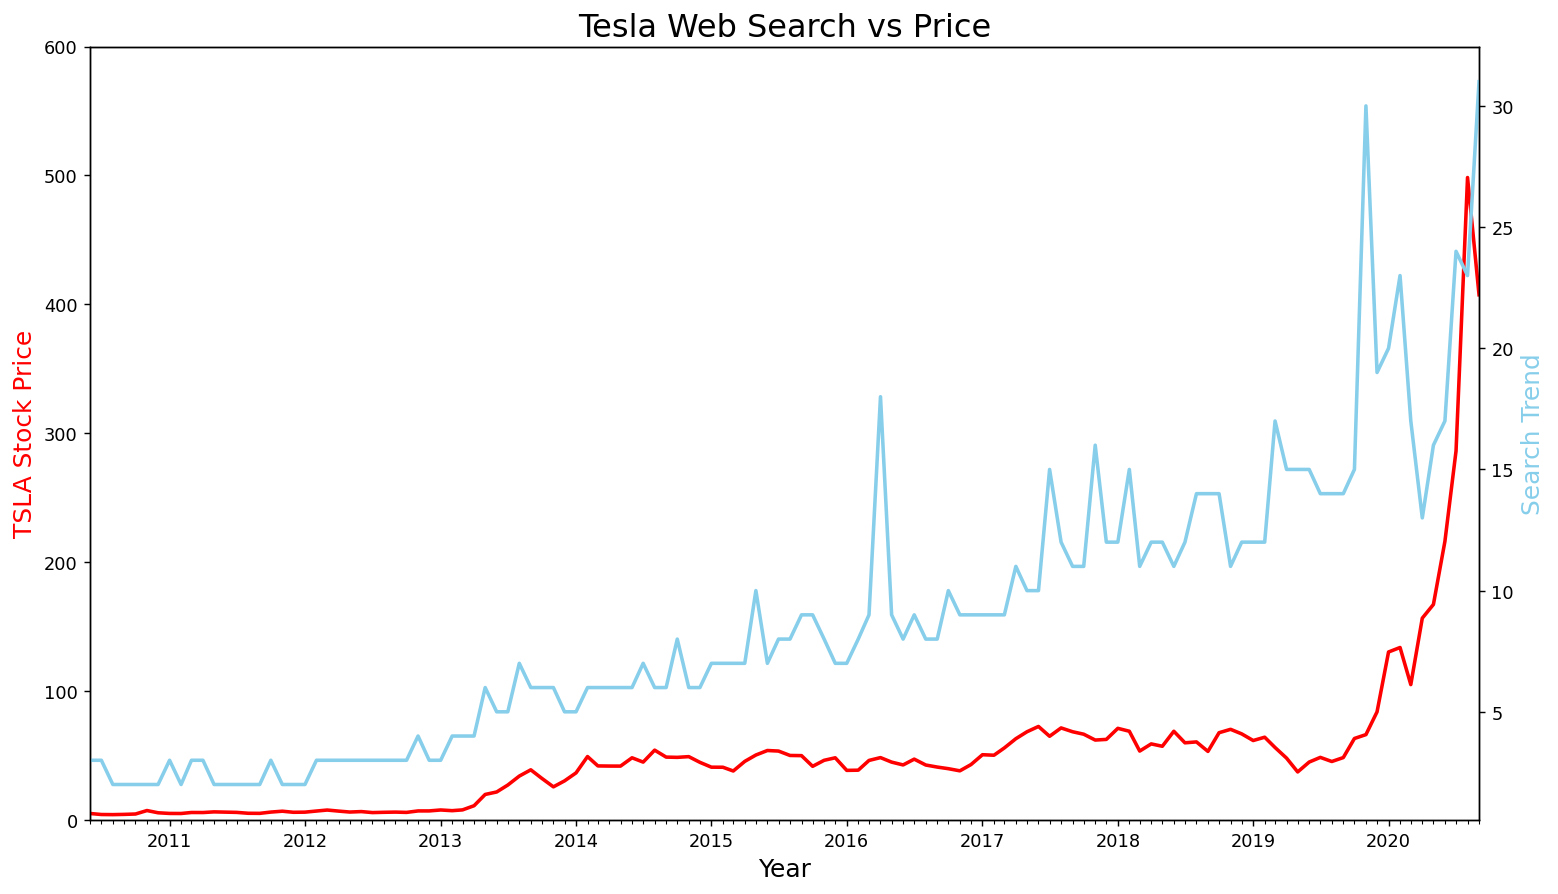

In [60]:
# size and resolution and title
plt.figure(figsize=(14,8), dpi=128)
plt.title('Tesla Web Search vs Price', fontsize=18)

ax1 = plt.gca() # get current axis
ax2 = ax1.twinx() 
 
# axes labels
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('TSLA Stock Price', color='red', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)
 
# Set the minimum and maximum values on the axes
ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

# NEW: Add the major and minor ticks, there will be big ticks for each year and small ticks for 11 months in between (the first month shows the new year)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# plot the lines
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='red', linewidth=2)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue', linewidth=2)

# explicitely call the plot (doesn't show that extra line of data above it)
plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

In [40]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator() # these help matplotlib find the months and years
years_fmt = mdates.DateFormatter('%Y') # this specifies how we want to display the dates

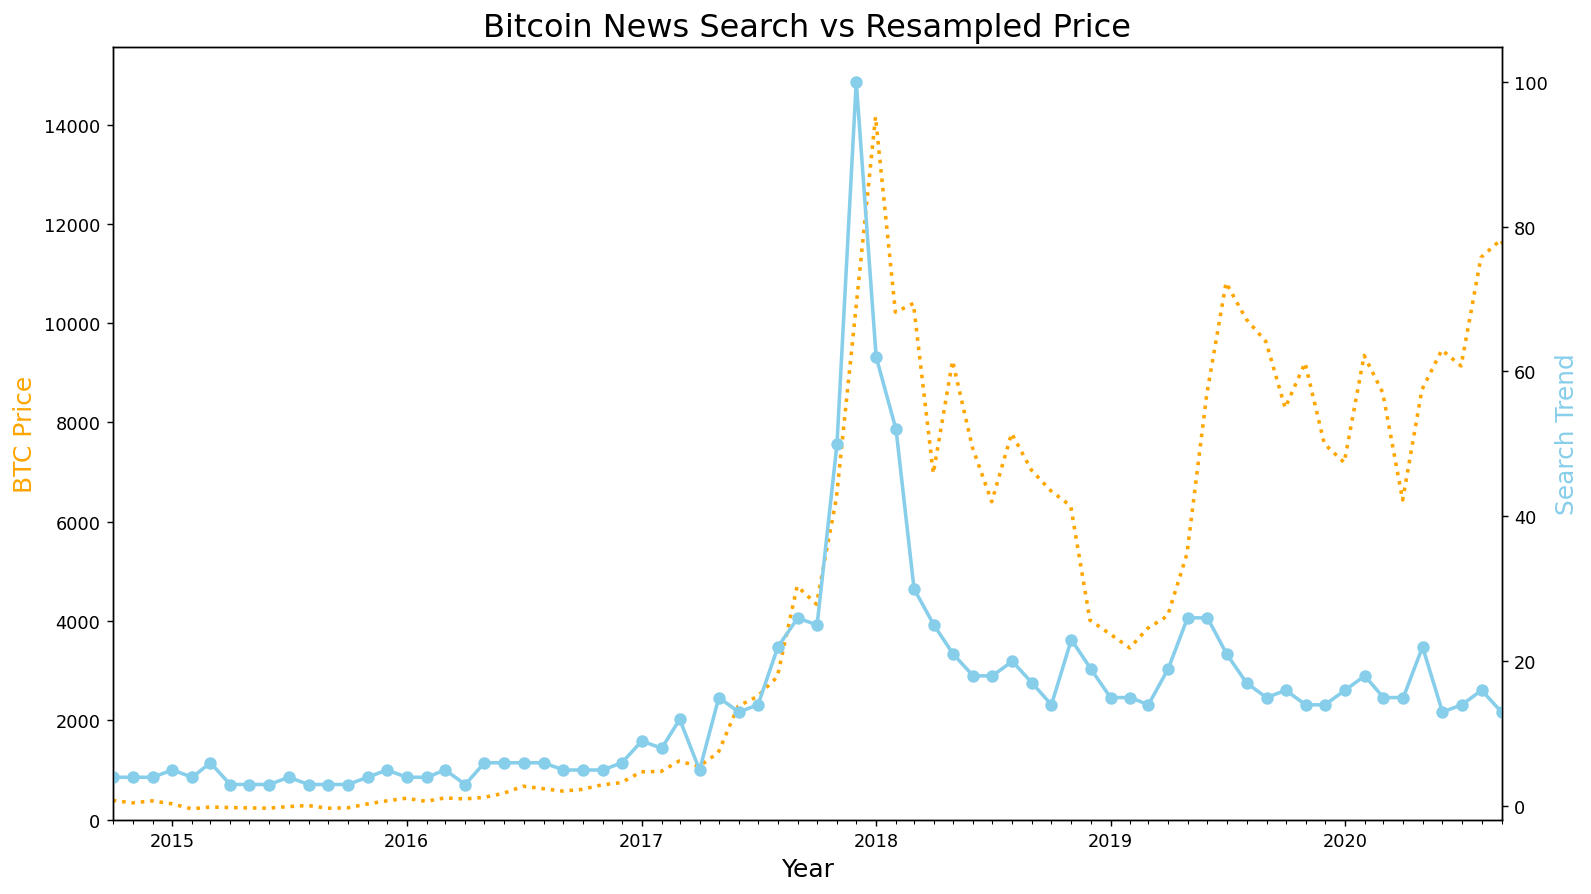

In [58]:
# size and resolution and title
plt.figure(figsize=(14,8), dpi=128)
plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)

ax1 = plt.gca() # get current axis
ax2 = ax1.twinx() 
 
# axes labels
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('BTC Price', color='orange', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)
 
# Set the minimum and maximum values on the axes
ax1.set_ylim([0, df_btc_monthly.CLOSE.max()*1.1])
ax1.set_xlim([df_btc_monthly.DATE.min(), df_btc_search.MONTH.max()])  #datasets don't line up perfectly for some reason, btc_monthly starts later and btc_search ends first

# NEW: Add the major and minor ticks, there will be big ticks for each year and small ticks for 11 months in between (the first month shows the new year)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# plot the lines
ax1.plot(df_btc_monthly.DATE, df_btc_monthly.CLOSE, color='orange', linewidth=2, linestyle='dotted')  # add dotted linestyle
ax2.plot(df_btc_search.MONTH, df_btc_search.BTC_NEWS_SEARCH, color='skyblue', linewidth=2, marker='o')  # add circle marker for datapoitns

# explicitely call the plot (doesn't show the plot outside of anaconda or google colab if you don't)
plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

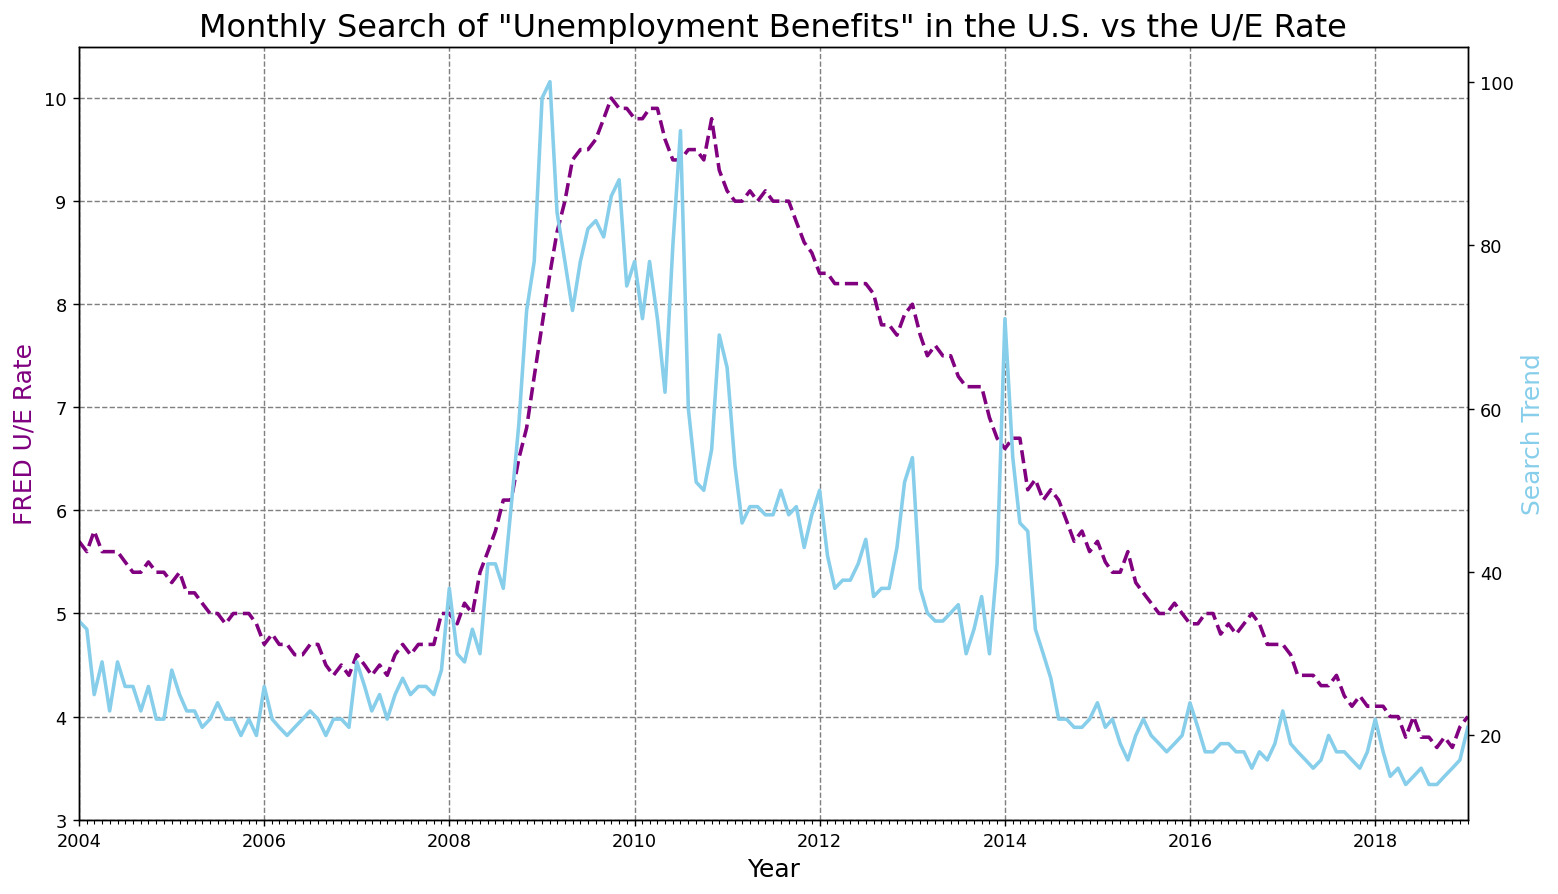

In [70]:
# size and resolution and title
plt.figure(figsize=(14,8), dpi=128)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)

ax1 = plt.gca() # get current axis
ax2 = ax1.twinx() 
 
# axes labels
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)
 
# Set the minimum and maximum values on the axes)
ax1.set_ylim([3, 10.5])
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

# NEW: Add the major and minor ticks, there will be big ticks for each year and small ticks for 11 months in between (the first month shows the new year)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# add a grid to the graph
ax1.grid(b=True, color='grey', linestyle='--')  # if you use ax1 you get a grid, if you use plt you only get horizontal lines, not sure why, check docs

# plot the lines
ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color='purple', linewidth=2, linestyle='--')
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, color='skyblue', linewidth=2)

# explicitely call the plot (doesn't show the plot outside of anaconda or google colab if you don't)
plt.show()

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


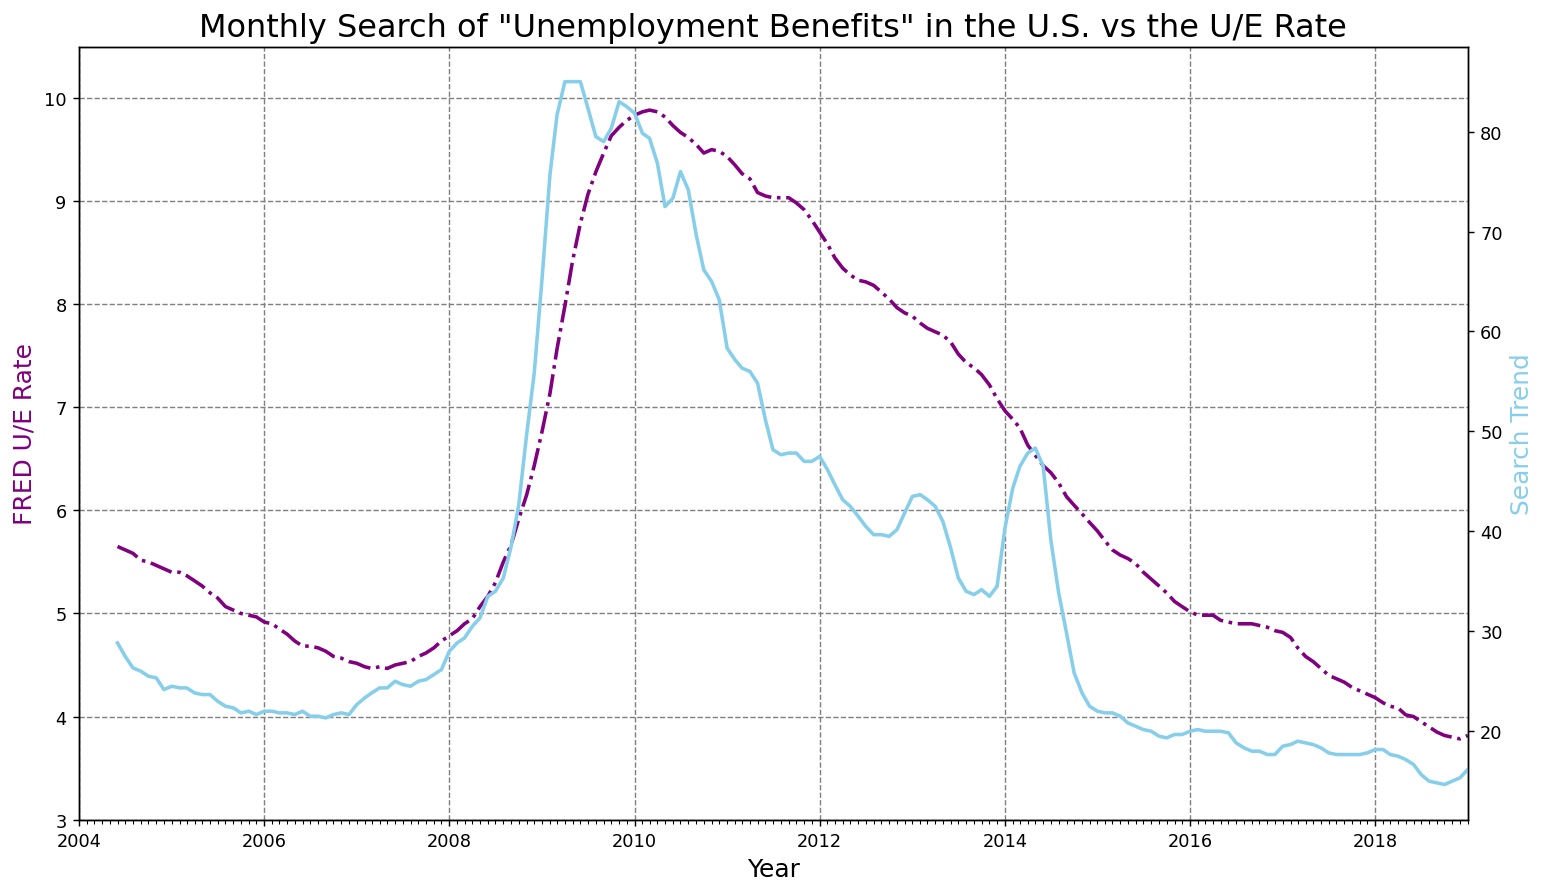

In [82]:
# get the 6-month rolling average of search trends, window=6 means roll each 6 datapoints and .mean() gets the average of those 2 columns we specify
rolled_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

# size and resolution and title
plt.figure(figsize=(14,8), dpi=128)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)

ax1 = plt.gca() # get current axis
ax2 = ax1.twinx() 
 
# axes labels
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)
 
# Set the minimum and maximum values on the axes)
ax1.set_ylim([3, 10.5])
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

# NEW: Add the major and minor ticks, there will be big ticks for each year and small ticks for 11 months in between (the first month shows the new year)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# add a grid to the graph
ax1.grid(b=True, color='grey', linestyle='--')  # if you use ax1 you get a grid, if you use plt you only get horizontal lines, not sure why, check docs

# plot the lines
ax1.plot(df_unemployment.MONTH, rolled_df.UNRATE, color='purple', linewidth=2, linestyle='-.')  # change df_unemployment to our rolled data in both axes to smooth them
ax2.plot(df_unemployment.MONTH, rolled_df.UE_BENEFITS_WEB_SEARCH, color='skyblue', linewidth=2)

# explicitely call the plot (doesn't show the plot outside of anaconda or google colab if you don't)
plt.show()

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [87]:
df_ue_2020 = pd.read_csv('data/UE Benefits Search vs UE Rate 2004-20.csv')
df_ue_2020.MONTH = pd.to_datetime(df_ue_2020.MONTH)
df_ue_2020.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,9,5.7
1,2004-02-01,8,5.6
2,2004-03-01,7,5.8
3,2004-04-01,8,5.6
4,2004-05-01,6,5.6


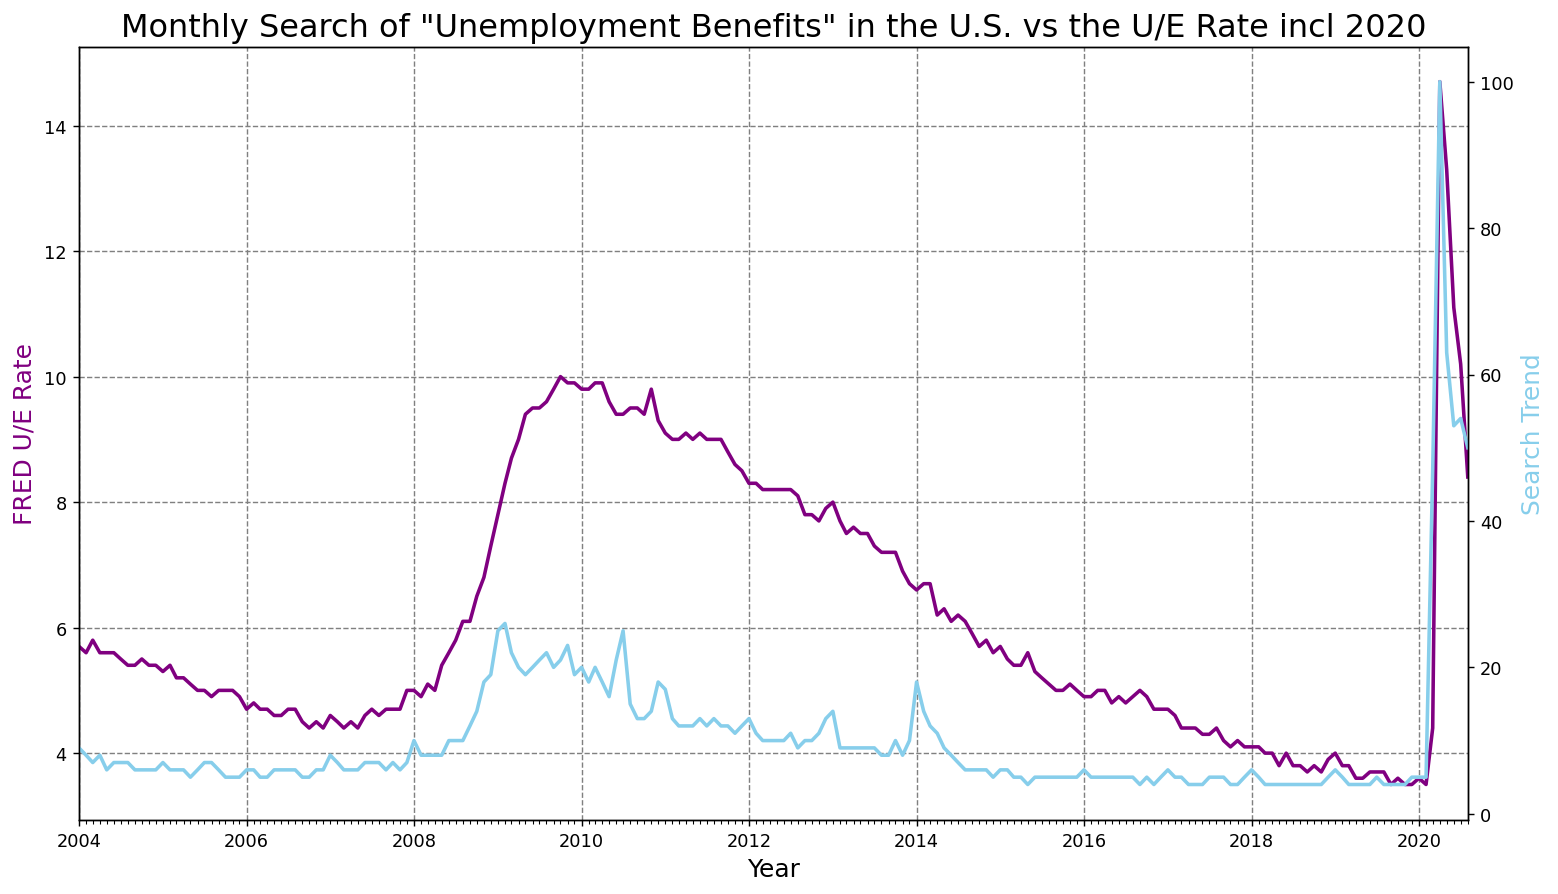

In [88]:
# size and resolution and title
plt.figure(figsize=(14,8), dpi=128)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate incl 2020', fontsize=18)

ax1 = plt.gca() # get current axis
ax2 = ax1.twinx() 
 
# axes labels
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)
 
# Set the minimum and maximum values on the axes
ax1.set_xlim([df_ue_2020.MONTH.min(), df_ue_2020.MONTH.max()])

# NEW: Add the major and minor ticks, there will be big ticks for each year and small ticks for 11 months in between (the first month shows the new year)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# add a grid to the graph
ax1.grid(b=True, color='grey', linestyle='--')  # if you use ax1 you get a grid, if you use plt you only get horizontal lines, not sure why, check docs

# plot the lines
ax1.plot(df_ue_2020.MONTH, df_ue_2020.UNRATE, color='purple', linewidth=2)
ax2.plot(df_ue_2020.MONTH, df_ue_2020.UE_BENEFITS_WEB_SEARCH, color='skyblue', linewidth=2)

# explicitely call the plot (doesn't show the plot outside of anaconda or google colab if you don't)
plt.show()

What we see here is that the unemployment rate spiked dramatically, this is either an outlier, or there is a reason for this. We look into it and see that this is due to covid-19 in 2020.